# Session 2: Python and PYBAMM

## Session 1 Recap

Heat transfer is a branch of engineering science that studies the transfer of energy due to temperature differences *only*

There are wide-ranging applications from aerospace, to materials science, to electrochemical energy storage. 

There are 3 basic and *distinct* modes of heat transfer: conductive, convective and radiative. Convection involves a moving fluid, radiative involves electromagnetic waves

Fourier's Law of Heat Conduction in one dimension: q = -kA dT/dx



Python is a programming language that is open source, containing lots of useful libraries, less verbose than C/Java (does the same thing with fewer lines of code) and in 2023, a great scientific computing environment. 

# Python Basics

## Packages

In any Python script you first import all your packages like so: 


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Defining variables, and doing math




In [28]:
a = range(0,20)
print(a)

for b in a:
    print(b)





range(0, 20)


TypeError: unsupported operand type(s) for *: 'range' and 'int'

## Defining functions

Creating functions allows you to use/call that same function over and over instead of repeating the same lines of code

**remember, syntax for printing something out is print(INSERT_TEXT_HERE)

In [22]:
def function(a,b):
    return a**b
    
print(function(10,2))

100


## Plotting things!

Remember we imported the matplotlib plotting package as "plt" 

First, we create some values to plot (an array of evenly spaced numbers from 0 to 100 and the square of that)

We initialie a figure and then a subplot (111 refers to a 1 by 1 and the first plot. 211 would refer to a 2 by 1 and the first plot, 453 would refer to a 4 by 5 and the third plot, 8,8,63 would refer to a 8 by 8 and the 63 plot..etc..)

We can control this subplot to fine detail..set the x-axis label, y-axis label, title, even specific colors, fonts of each

plt.show to show the plot directly inline 

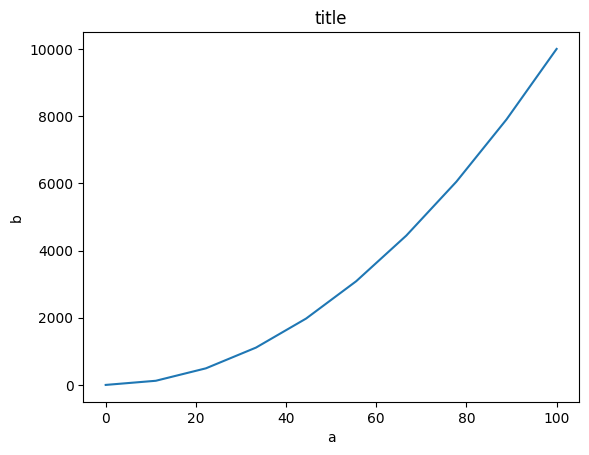

In [21]:
a = np.linspace(0,100,10)
b = a**2 

figure1 = plt.figure()
ax1 = figure1.add_subplot(111)

ax1.plot(a,b)
ax1.set_xlabel('a')
ax1.set_ylabel('b')
ax1.set_title('title')

plt.show()




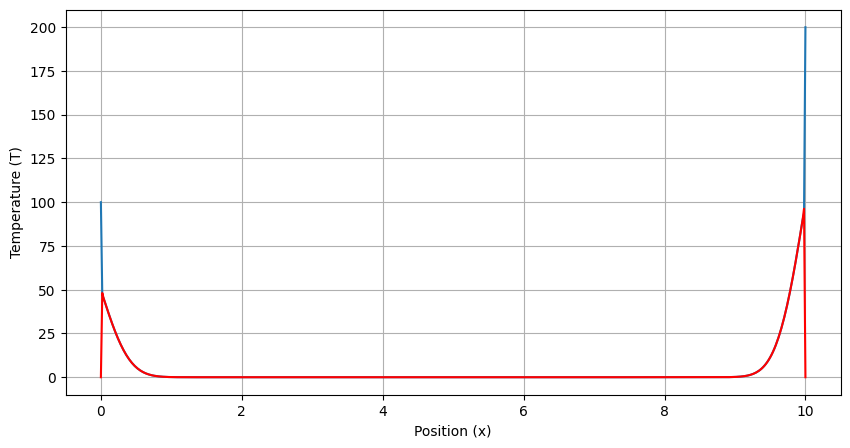

In [15]:

# Constants
L = 10.0  # Length of the rod
Nx = 500  # Number of spatial points
alpha = 0.01  # Thermal diffusivity
T_left = 100.0  # Left boundary temperature
T_right = 200.0  # Right boundary temperature

# Discretization
dx = L / (Nx - 1)
dt = 0.001  # Time step size
Nt = 5000  # Number of time steps

# Initialize temperature array
T = np.zeros(Nx)
T_new = np.copy(T)

# Boundary conditions
T[0] = T_left
T[-1] = T_right

# Main loop for time integration
for t in range(Nt):
    for i in range(1, Nx - 1):
        T_new[i] = T[i] + alpha * dt / dx**2 * (T[i+1] - 2 * T[i] + T[i-1])
    
    # Update temperature array
    T, T_new = T_new, T

# Create spatial grid
x = np.linspace(0, L, Nx)

# Plot the temperature distribution
plt.figure(figsize=(10, 5))
plt.plot(x, T)
plt.plot(x, T_new, c='r')
plt.xlabel('Position (x)')
plt.ylabel('Temperature (T)')
plt.grid(True)
plt.show()

/var/folders/3v/zrq9tpx16tn19blc17bckyg00000gn/T/ipykernel_16074/3183970389.py:33: RuntimeWarning: overflow encountered in scalar multiply
  T_new[i] = T[i] + alpha * dt / dx**2 * (T[i+1] - 2 * T[i] + T[i-1])
/var/folders/3v/zrq9tpx16tn19blc17bckyg00000gn/T/ipykernel_16074/3183970389.py:33: RuntimeWarning: invalid value encountered in scalar add
  T_new[i] = T[i] + alpha * dt / dx**2 * (T[i+1] - 2 * T[i] + T[i-1])
/var/folders/3v/zrq9tpx16tn19blc17bckyg00000gn/T/ipykernel_16074/3183970389.py:33: RuntimeWarning: overflow encountered in scalar subtract
  T_new[i] = T[i] + alpha * dt / dx**2 * (T[i+1] - 2 * T[i] + T[i-1])
/var/folders/3v/zrq9tpx16tn19blc17bckyg00000gn/T/ipykernel_16074/3183970389.py:33: RuntimeWarning: overflow encountered in scalar add
  T_new[i] = T[i] + alpha * dt / dx**2 * (T[i+1] - 2 * T[i] + T[i-1])
/var/folders/3v/zrq9tpx16tn19blc17bckyg00000gn/T/ipykernel_16074/3183970389.py:33: RuntimeWarning: invalid value encountered in scalar subtract
  T_new[i] = T[i] + alpha

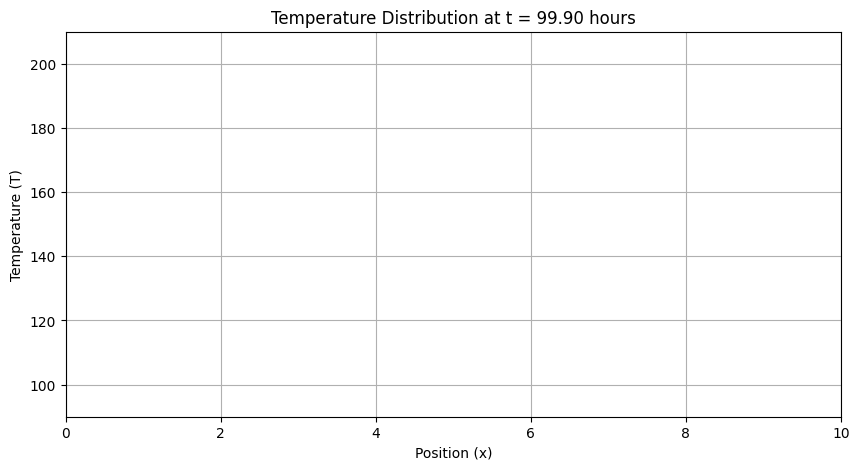

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
L = 10.0  # Length of the rod
Nx = 1000  # Number of spatial points
alpha = 0.05  # Thermal diffusivity
T_left = 100.0  # Left boundary temperature
T_right = 200.0  # Right boundary temperature
total_time = 100.0  # Total simulation time (in hours)

# Discretization
dx = L / (Nx - 1)
dt = 0.1  # Time step size
Nt = int(total_time / dt)  # Number of time steps

# Initialize temperature array
T = np.zeros(Nx)
T_new = np.copy(T)

# Boundary conditions
T[0] = T_left
T[-1] = T_right

# Create spatial grid
x = np.linspace(0, L, Nx)

# Function to update the plot for each time step
def update(frame):
    global T, T_new
    for i in range(1, Nx - 1):
        T_new[i] = T[i] + alpha * dt / dx**2 * (T[i+1] - 2 * T[i] + T[i-1])
    
    T, T_new = T_new, T
    line.set_data(x, T)
    ax.set_title(f'Temperature Distribution at t = {frame * dt:.2f} hours')
    return line,

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
line, = ax.plot(x, T)

# Set plot limits
ax.set_xlim(0, L)
ax.set_ylim(min(T_left, T_right) - 10, max(T_left, T_right) + 10)

# Create the animation
ani = FuncAnimation(fig, update, frames=Nt, interval=10, blit=True)

# Save the animation as an MP4 video
ani.save("temp_dist.mp4", writer="ffmpeg")

# Display the animation (optional)
plt.xlabel('Position (x)')
plt.ylabel('Temperature (T)')
plt.grid(True)
plt.show()


In [13]:
import pybamm

## https://docs.pybamm.org/en/latest/source/examples/notebooks/models/thermal-models.html 

full_thermal_model = pybamm.lithium_ion.SPMe(
    {"thermal": "x-full"}, name="full thermal model"
)
lumped_thermal_model = pybamm.lithium_ion.SPMe(
    {"thermal": "lumped"}, name="lumped thermal model"
)
models = [full_thermal_model, lumped_thermal_model]

parameter_values = pybamm.ParameterValues("Marquis2019")

full_params = parameter_values.copy()
full_params.update(
    {
        "Negative current collector"
        + " surface heat transfer coefficient [W.m-2.K-1]": 5,
        "Positive current collector"
        + " surface heat transfer coefficient [W.m-2.K-1]": 5,
        "Negative tab heat transfer coefficient [W.m-2.K-1]": 0,
        "Positive tab heat transfer coefficient [W.m-2.K-1]": 0,
        "Edge heat transfer coefficient [W.m-2.K-1]": 0,
    }
)

A = parameter_values["Electrode width [m]"] * parameter_values["Electrode height [m]"]
lumped_params = parameter_values.copy()
lumped_params.update(
    {
        "Total heat transfer coefficient [W.m-2.K-1]": 5,
        "Cell cooling surface area [m2]": 2 * A,
    }
)

params = [full_params, lumped_params]
# loop over the models and solve
sols = []
for model, param in zip(models, params):
    param["Current function [A]"] = 3 * 0.68
    sim = pybamm.Simulation(model, parameter_values=param)
    sim.solve([0, 3600])
    sols.append(sim.solution)


# plot
output_variables = [
    "Voltage [V]",
    "X-averaged cell temperature [K]",
    "Cell temperature [K]",
]
pybamm.dynamic_plot(sols, output_variables)

# plot the results
pybamm.dynamic_plot(
    sols,
    [
        "Volume-averaged cell temperature [K]",
        "Volume-averaged total heating [W.m-3]",
        "Current [A]",
        "Voltage [V]",
    ],
)


interactive(children=(FloatSlider(value=0.0, description='t', max=1154.876529354234, step=11.54876529354234), …

interactive(children=(FloatSlider(value=0.0, description='t', max=1154.876529354234, step=11.54876529354234), …